<a href="https://colab.research.google.com/github/atharv-451/Dogs-Vs-Cats/blob/main/Dog_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# installing kaggle library
!pip install kaggle

In [7]:
#Configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dataset From Kaggle

In [8]:
#Kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:10<00:00, 87.8MB/s]
100% 812M/812M [00:10<00:00, 82.9MB/s]


In [9]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os
#Counting the no. of File in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  25000


Printing the Name of Images

In [12]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.11362.jpg', 'cat.7502.jpg', 'cat.4640.jpg', 'cat.146.jpg', 'cat.685.jpg', 'dog.153.jpg', 'dog.8441.jpg', 'cat.1457.jpg', 'dog.8835.jpg', 'dog.5940.jpg', 'cat.4381.jpg', 'dog.10590.jpg', 'dog.6005.jpg', 'cat.8033.jpg', 'cat.1949.jpg', 'cat.7275.jpg', 'cat.11120.jpg', 'dog.11727.jpg', 'cat.3050.jpg', 'dog.9851.jpg', 'dog.5461.jpg', 'cat.681.jpg', 'cat.2834.jpg', 'cat.988.jpg', 'cat.1329.jpg', 'dog.3509.jpg', 'dog.7284.jpg', 'cat.4169.jpg', 'cat.6098.jpg', 'cat.8808.jpg', 'cat.9200.jpg', 'dog.7666.jpg', 'cat.5443.jpg', 'dog.5183.jpg', 'cat.7441.jpg', 'cat.1764.jpg', 'cat.9816.jpg', 'cat.4908.jpg', 'dog.3386.jpg', 'dog.6534.jpg', 'dog.8445.jpg', 'dog.5620.jpg', 'cat.10613.jpg', 'cat.8631.jpg', 'dog.4634.jpg', 'dog.12476.jpg', 'cat.8953.jpg', 'cat.210.jpg', 'dog.11696.jpg', 'dog.11916.jpg', 'cat.10518.jpg', 'dog.3773.jpg', 'cat.5668.jpg', 'cat.890.jpg', 'dog.10306.jpg', 'dog.9612.jpg', 'cat.124.jpg', 'dog.5102.jpg', 'dog.11173.jpg', 'cat.8348.jpg', 'cat.5770.jpg', 'cat.4622.jpg', 'cat

Importing Dependencies

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the Images

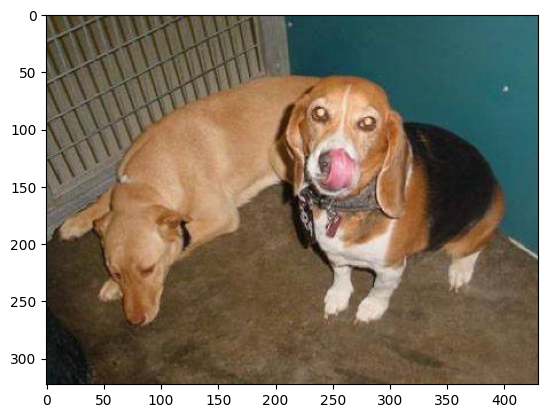

In [14]:
# display dog image
img = mpimg.imread('/content/train/dog.5940.jpg')
imgplt = plt.imshow(img)
plt.show()

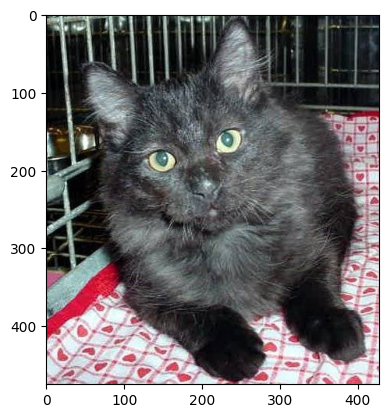

In [15]:
# display cat image
img = mpimg.imread('/content/train/cat.7502.jpg')
imgplt = plt.imshow(img)
plt.show()

Counting the number of dog and cat images

In [16]:
file_names = os.listdir('/content/train/')
dog = 0
cat = 0
for img_file in file_names:
  if img_file.startswith('dog'):
    dog+=1
  else:
    cat+=1
print("Number of dog images: ",dog)
print("Number of cat images: ",cat)

Number of dog images:  12500
Number of cat images:  12500


Resizing All the images

In [17]:
#Creating a directory for resized images
os.mkdir('/content/image_resized')

In [18]:
org = "/content/train/"
rez = "/content/image_resized/"

for i in range(2500):

  filename = os.listdir(org)[i]
  img_path = org + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = rez + filename
  img.save(newImgPath)

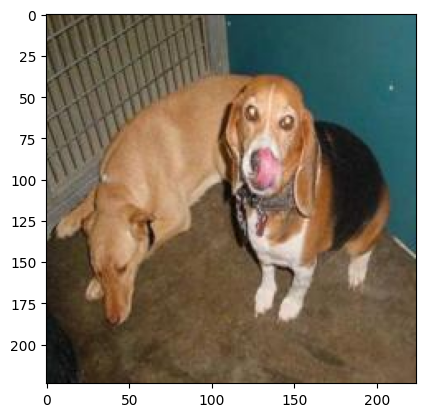

In [19]:
# display Resized dog image
img = mpimg.imread('/content/image_resized/dog.5940.jpg')
imgplt = plt.imshow(img)
plt.show()

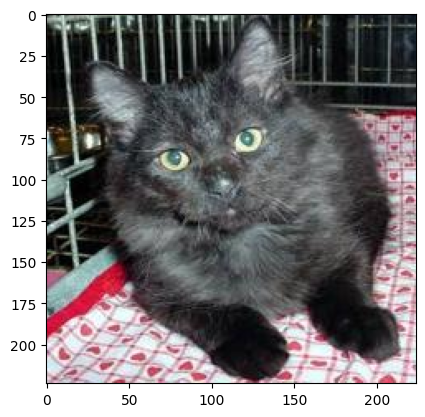

In [20]:
# display Resized cat image
img = mpimg.imread('/content/image_resized/cat.7502.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cats -> 0

Dogs -> 1

In [21]:
# Creating a for loop to assign labels
file_names = os.listdir('/content/image_resized')


labels = []

for i in range(2500):

  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

print(labels)
print(len(labels))

[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 

In [22]:
# counting the images of dogs and cats out of 2500 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1224 1276]


Converting all the resized images to numpy arrays

In [23]:
import cv2
import glob

In [28]:
img_dir = '/content/image_resized/'
img_ext = ['png', 'jpg']

files = []

[files.extend(glob.glob(img_dir + '*.' + e)) for e in img_ext]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [30]:
print(type(dog_cat_images))
print(dog_cat_images.shape)

<class 'numpy.ndarray'>
(2500, 224, 224, 3)


In [31]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(2500, 224, 224, 3) (2000, 224, 224, 3) (500, 224, 224, 3)


2000 -> Training images

500 -> Test images

In [34]:
# Scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [35]:
print(X_train_scaled)

[[[[0.03137255 0.         0.00392157]
   [0.03137255 0.         0.00392157]
   [0.03137255 0.         0.00392157]
   ...
   [0.61176471 0.72156863 0.76470588]
   [0.6        0.71764706 0.76078431]
   [0.6        0.71764706 0.76078431]]

  [[0.03137255 0.         0.00392157]
   [0.03137255 0.         0.00392157]
   [0.03137255 0.         0.00392157]
   ...
   [0.61568627 0.7254902  0.76862745]
   [0.60392157 0.72156863 0.76470588]
   [0.60392157 0.72156863 0.76470588]]

  [[0.03137255 0.         0.00392157]
   [0.03137255 0.         0.00392157]
   [0.03137255 0.         0.00392157]
   ...
   [0.61960784 0.72941176 0.77254902]
   [0.60784314 0.7254902  0.76862745]
   [0.60784314 0.7254902  0.76862745]]

  ...

  [[0.01176471 0.16470588 0.36862745]
   [0.00392157 0.15686275 0.36078431]
   [0.         0.15686275 0.36470588]
   ...
   [0.28235294 0.3254902  0.41176471]
   [0.26666667 0.29803922 0.38823529]
   [0.25098039 0.28235294 0.37254902]]

  [[0.04313725 0.19607843 0.4       ]
   [0.0

**Building the Neural Network**

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

In [37]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable = False)

In [38]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)


])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [39]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [40]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
63/63 [==============================] - 77s 1s/step - loss: 0.2115 - acc: 0.9010
Epoch 2/5
63/63 [==============================] - 71s 1s/step - loss: 0.0625 - acc: 0.9780
Epoch 3/5
63/63 [==============================] - 72s 1s/step - loss: 0.0453 - acc: 0.9855
Epoch 4/5
63/63 [==============================] - 74s 1s/step - loss: 0.0369 - acc: 0.9905
Epoch 5/5
63/63 [==============================] - 70s 1s/step - loss: 0.0292 - acc: 0.9935


In [41]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss: ", score)
print("Test Accuracy: ", acc)

16/16 [==============================] - 17s 1s/step - loss: 0.0457 - acc: 0.9880
Test Loss:  0.04570095241069794
Test Accuracy:  0.9879999756813049


**Predictive System**

Path of the image to be predicted: /content/Cat.jpg


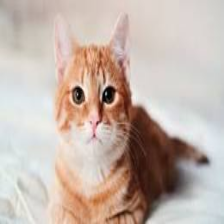

1/1 [==============================] - 0s 51ms/step
The image represents a CAT


In [43]:
input_img_path = input("Path of the image to be predicted: ")

input_img = cv2.imread(input_img_path)

input_img_rez = cv2.resize(input_img, (224,224))

cv2_imshow(input_img_rez)

input_img_scaled = input_img_rez/255

img_reshaped = np.reshape(input_img_scaled, [1, 224, 224, 3])

input_pred = model.predict(img_reshaped)

input_pred_label = np.argmax(input_pred)

if input_pred_label == 0:
  print("The image represents a CAT")
else:
  print("The image represents a DOG")